In [110]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *

In [99]:
# Average of efficacy
W_EI=0.44
W_IE=0.66
W_II=0.54
W_EE=0.37
W_EI2=0.49
W_IE2=0.65
W_II2=0.53

In [100]:
mu_EI=W_EI
mu_IE=W_IE
mu_II=W_II
sigma_EI2=W_EI2-W_EI**2
sigma_IE2=W_IE2-W_IE2**2
sigma_II2=W_II2-W_II**2
sigma_EI=np.sqrt(sigma_EI2)
sigma_IE=np.sqrt(sigma_IE2)
sigma_II=np.sqrt(sigma_II2)
print(str(sigma_EI2)+'\n'+str(sigma_IE2)+'\n'+str(sigma_II2))

0.2964
0.22749999999999998
0.2384


In [101]:
# Extracting E->E connectivity from the spine imaging data
c_EE=0.2
path="../../../documents/Practical Biomedical Modelling/Semester 2/Global_Spines_info.csv"
spines_info=pd.read_csv(path)
spines_info.drop('Unnamed: 0',axis=1,inplace=True)
spines_info.head()

,CellID,DendriteID,SpineID,Global_SpineID,Starting Imaging Session,Ending Imaging Session,Volume,Lambda1,Lambda2,Shape,Distance,Center X,Center Y,Nearest Point X,Nearest Point Y,Z-Dimension Location
0,1,1,1,1,1,6,10.6930,7.6533,4.5668,0.252576,11.156,114.38,176.15,114.0,165.0,0
1,1,1,2,2,1,1,5.1684,5.0923,3.8244,0.142194,11.822,174.25,140.18,174.0,152.0,0
2,1,1,3,3,1,6,14.6730,9.0718,6.6570,0.153527,10.853,198.24,146.15,198.0,157.0,0
3,1,1,4,4,1,5,42.8730,36.3070,7.9729,0.639886,15.923,209.63,148.30,207.0,164.0,0
4,1,1,5,5,1,1,19.5290,30.3960,5.9931,0.670610,12.720,389.14,271.00,397.0,261.0,-1


In [102]:
spines_IS1=spines_info.loc[spines_info['Starting Imaging Session']==1]
spines_IS1.head(100)
S=spines_IS1['Volume'].mean()
g=W_EE/S
print(g)

0.00756288522510971


In [103]:
# Connectivity matrix 8*8
# EI
# I*
def W_Construction():
    c_EE=0.51
    W=np.zeros((8,8))
    c=np.zeros((8,8))
    for i in range(6):
        for j in range(6,8):
            if(random.uniform(0,1)<=0.5):
                c[i,j]=1
                W[i,j]=np.random.lognormal(mu_EI,sigma_EI)
    for i in range(6,8):
        for j in range(6):
            if(random.uniform(0,1)<=0.5):
                c[i,j]=1
                W[i,j]=np.random.lognormal(mu_IE,sigma_IE)
    for i in range(6,8):
        for j in range(6,8):
            if(random.uniform(0,1)<=0.5):
                c[i,j]=1
                W[i,j]=np.random.lognormal(mu_II,sigma_II)
    for i in range(6):
        for j in range(6):
            if(random.uniform(0,1)<=c_EE):
                index=random.randint(1,3688)
                W[i,j]=spines_info['Volume'].loc[spines_info['Global_SpineID']==index]*g
            else:
                W[i,j]=0
            c[i,j]=c_EE
    return W,c

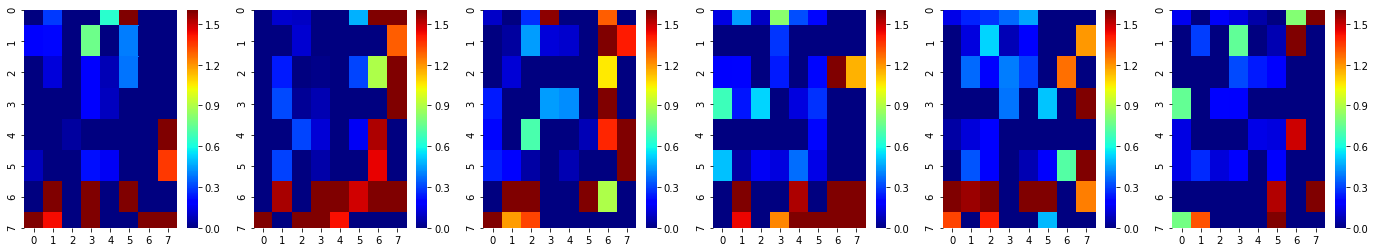

In [104]:
%matplotlib inline
W=np.zeros((6,8,8))
c=np.zeros((6,8,8))
plt.figure(figsize=(24,4))
for i in range(6):
    W[i],c[i]=W_Construction()
    plt.subplot(1,6,i+1)
    sns.heatmap(W[i],vmin=0,vmax=1.6,cmap='jet')

In [124]:
# Recurrent input of neuron i
h=np.zeros((8,5000))
for i in range(8):
    for j in range(6):
        tsteps=0
        while(True):
            tstep=random.randint(10,100)
            tsteps=tsteps+tstep
            if(tsteps<5000):
                h[i,tsteps]=h[i,tsteps]+c[0,i,j]*W[0,i,j]
            else:
                break
    for j in range(6,8):
        tsteps=0
        while(True):
            tstep=random.randint(10,100)
            tsteps=tsteps+tstep
            if(tsteps<5000):
                h[i,tsteps]=h[i,tsteps]-c[0,i,j]*W[0,i,j]
            else:
                break

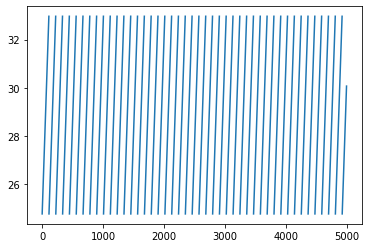

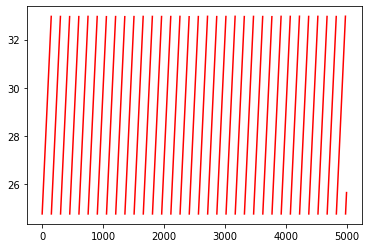

In [132]:
# Potential of neuron
v=np.zeros((8,5000))
theta=33
tau_m=10
H_E=77.6
H_I=57.8
v_R=24.75
for i in range(8):
    v[i,0]=v_R
t=range(4999)
for dt in t:
    for i in range(6):
        if v[i,dt]==float('inf'):
            v[i,dt+1]=v_R
        else:
            v[i,dt+1]=v[i,dt]+0.001*(-v[i,dt]/tau_m+h[i,dt]+H_E)
            if v[i,dt+1]>=theta:
                v[i,dt+1]=float('inf')
    for i in range(6,8):
        if v[i,dt]==float('inf'):
            v[i,dt+1]=v_R
        else:
            v[i,dt+1]=v[i,dt]+0.001*(-v[i,dt]/tau_m+h[i,dt]+H_I)
            if v[i,dt+1]>=theta:
                v[i,dt+1]=float('inf')
plt.figure()
plt.plot(range(5000),v[1])
plt.figure()
plt.plot(range(5000),v[6],'r')

[0. 1. 2. 3. 4. 5.]
